# Scaling Techniques:-

Scaling scales your dataset and transform your dataset with small values that model can learn easyly.

See the table below:

In [1]:
dict={"Gender":[0,1,0,1,1],"Age":[35,25,17,28,38],"Salary":[40000,20500,15000,78000,45000]}
import pandas as pd
pd.DataFrame(dict)

,Gender,Age,Salary
0,0,35,40000
1,1,25,20500
2,0,17,15000
3,1,28,78000
4,1,38,45000


Suppose I have a dataset like this.So in this dataset you can see Gender column has only binary values,Age column has only two digit values and Salary column has upto 5 digit values.You can pass this dataset to machine learning there is no problem but you could increase your accuracy score if you apply scalling techniques to your dataset. 

There are two types of scaling techniques 1> StandardScaler, 2>MinMaxScaler.

1> Standard Scaler:-

When you apply Standard scaler to your dataset it organise your dataset like its mean value should 0 and std should +-1.That means it converts your dataset into normal distribution.

2>MinMaxScaler:-
    
    When you apply MinMaxScaler to your dataset it sets your dataset column values to 0 to 1 where 1 is maximum and 0 is minimum. So if you apply MinMaxScaler to your dataset so every columns data of your dataset is converted to 0 to 1 values like 0.2,0.256,0.84522,0.99.

# So I will load a dataset name breast_cancer form sklearn and then I will perform LogisticRegression on it and check the accuracy_score,classification_report and confution_matrix and after that I will preform scaling with x values and will pass the scaled x values to LogisticRegression and to compare accuracy_score,classification_report,confusion_matrix to check that our accuracy_score is improved or not.Lets see how can I do that:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings("ignore")

In [5]:
cancer=load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
ds=pd.DataFrame(cancer.data,columns=cancer.feature_names)
ds

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
ds["Target"]=cancer.target
ds

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: xlabel='Target', ylabel='count'>

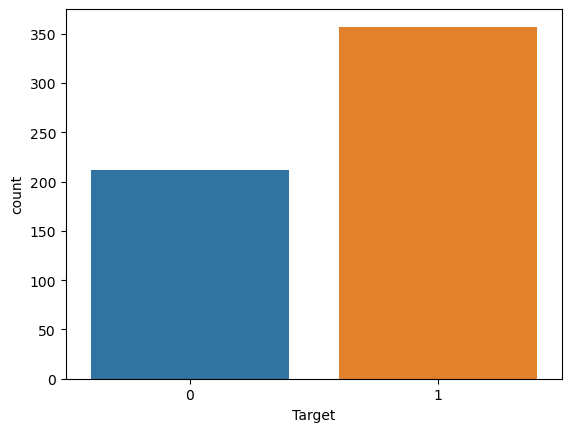

In [17]:
sns.countplot(x=ds["Target"])

In [19]:
ds["Target"].value_counts()

1    357
0    212
Name: Target, dtype: int64

<Axes: >

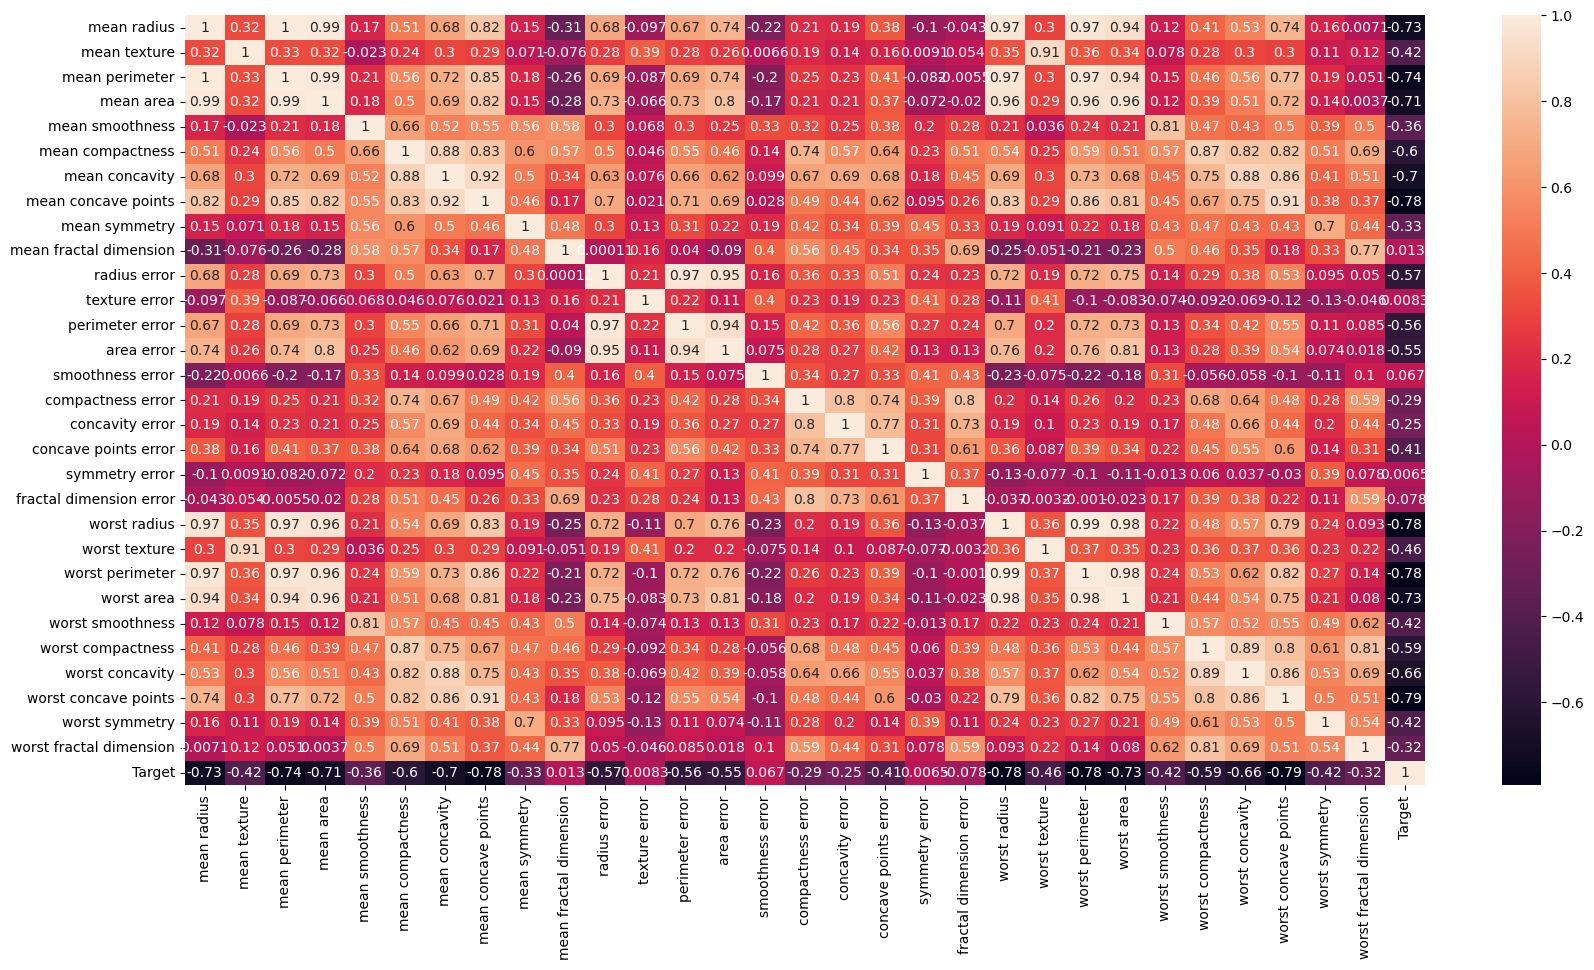

In [21]:
cor=ds.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

In [23]:
x=ds.iloc[:,:-1]
x.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [25]:
y=ds.iloc[:,-1]
y.tail(2)

567    0
568    1
Name: Target, dtype: int32

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [28]:
x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [29]:
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [30]:
y_train.shape

(455,)

In [31]:
y_test.shape

(114,)

In [33]:
lg=LogisticRegression()

In [34]:
lg.fit(x_train,y_train)
print(lg.score(x_train,y_train))

0.945054945054945


In [35]:
pred=lg.predict(x_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [38]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9649122807017544
[[40  3]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<Axes: >

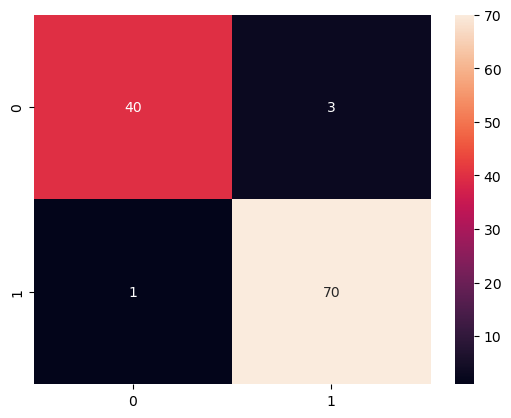

In [41]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [53]:
def cancer_pred(p):
    p=p.reshape(1,-1)
    t=lg.predict(p)
    if t==0:
        print("Patient does not has cancer")
    else:
        print("Patient has cancer")

In [47]:
x.to_csv("x_data.csv")

Here I just exported my x value data in form of a csv file so I can copy 30 input value form that csv file and can check that my model can predict or not.

In [54]:
k=np.array([17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189

])

In [55]:
cancer_pred(k)

Patient does not has cancer


# Using Scaling technique now:

# 1> Using StandardScaler:

In [59]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
new_x=st.fit_transform(x)
new_x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [60]:
new_x=pd.DataFrame(new_x)
new_x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# Now I will perform LogisticRegression again with my new scaled x values which I stored in new_x variable:

In [61]:
train_x,test_x,train_y,test_y=train_test_split(new_x,y,test_size=.20,random_state=42)

In [64]:
lg.fit(train_x,train_y)
print(lg.score(train_x,train_y))

0.9868131868131869


In [63]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Target, Length: 569, dtype: int32

In [65]:
predsc=lg.predict(test_x)
predsc

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [66]:
print(accuracy_score(test_y,predsc))
print(confusion_matrix(test_y,predsc))
print(classification_report(test_y,predsc))

0.9736842105263158
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Now you can see after using StandardScaler my accuracy_score is 0.9736842105263158 and without scaling my accuracy_score was 0.9649122807017544 so we can say after using StandardScaler my model is working much better. 

# 2> Using MinMaxScaler:

In [68]:
from sklearn.preprocessing import MinMaxScaler

mns=MinMaxScaler()

again_x=mns.fit_transform(x)

again_x=pd.DataFrame(again_x)
again_x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Here I convert my x values to MinMaxScaler and you can clearly see all values are converted between 0 to 1.

In [69]:
xtrain,xtest,ytrain,ytest=train_test_split(again_x,y,test_size=.20,random_state=42)

In [70]:
lg.fit(xtrain,ytrain)
print(lg.score(xtrain,ytrain))

0.967032967032967


In [71]:
predmn=lg.predict(xtest)
predmn

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [72]:
print(accuracy_score(ytest,predmn))
print(confusion_matrix(ytest,predmn))
print(classification_report(ytest,predmn))

0.9824561403508771
[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Now you can see after using MinMaxScaler my accuracy_score is 0.9824561403508771 and without scaling my accuracy_score was 0.9649122807017544 so we can say after using MinMaxScaler my model is working much better.

# Now I will load Abalone dataset and perform EDA and LinearRegression on it. Lets see how can I do that:

# Linear Model must have data----- Abalone Final

Linearity: assumes that the relationship between predictors and target variable is linear

No noise: eg. that there are no outliers in the data

No collinearity: if you have highly correlated predictors, it's most likely your model will overfit

Normal distribution: more reliable predictions are made if the predictors and the target variable are normally distributed

Scale: it's a distance-based algorithm, so preditors should be scaled - like with standard scaler

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [75]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv",na_values=".")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [77]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<Axes: >

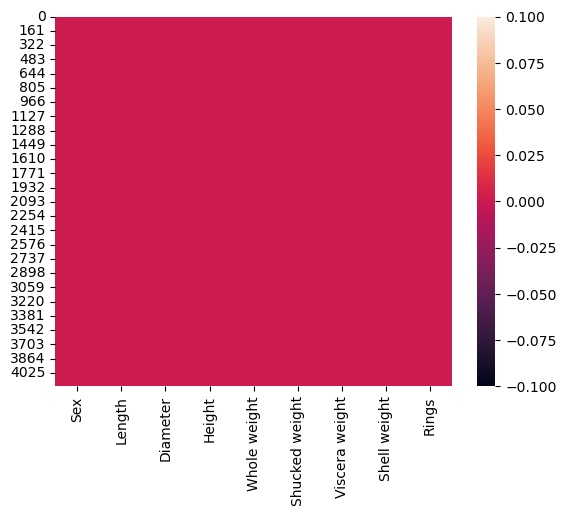

In [78]:
sns.heatmap(df.isnull())

In [82]:
from sklearn.preprocessing import LabelEncoder
lebcod=LabelEncoder()

df["Sex"]=lebcod.fit_transform(df["Sex"])

In [83]:
df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


Here you can see I changed the Sex column value String to int by using LabelEncoder.

In [81]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [87]:
df.rename(columns={"Sex":"Gender"},inplace=True)

In [ ]:
Here I rename column "Sex" with "Gender"

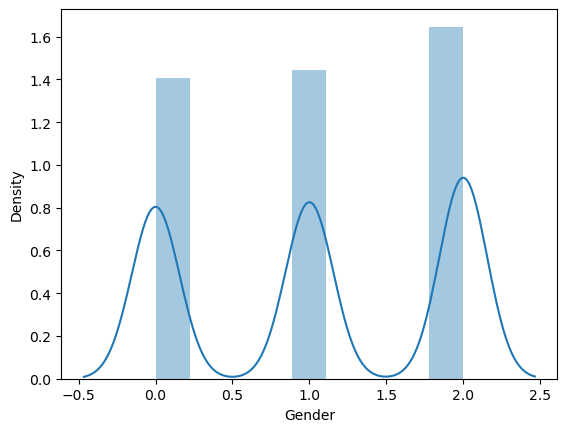

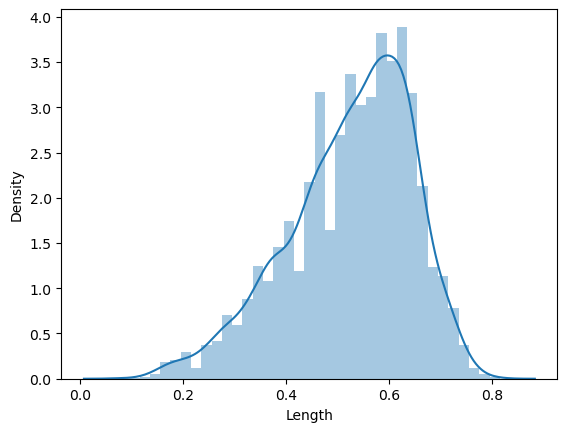

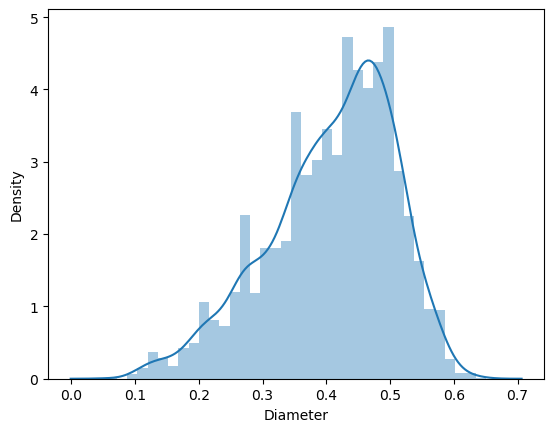

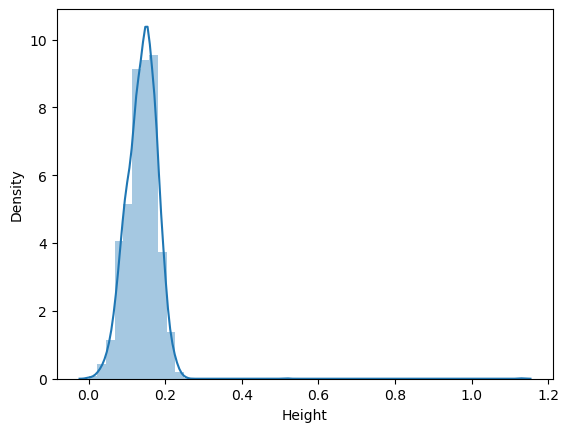

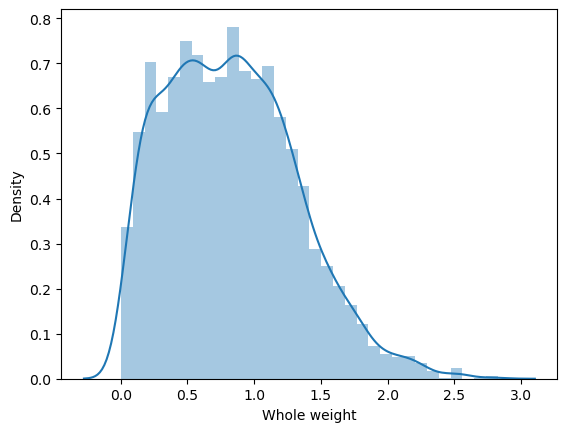

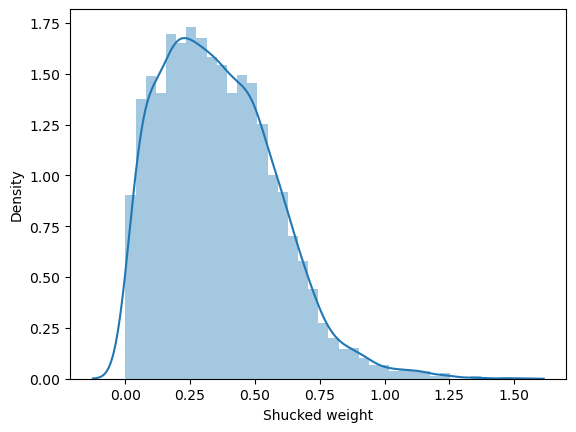

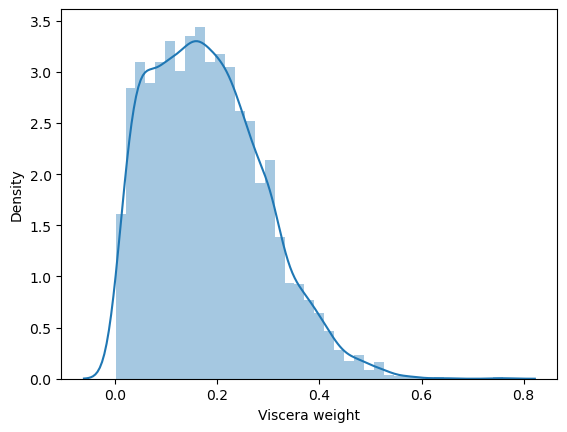

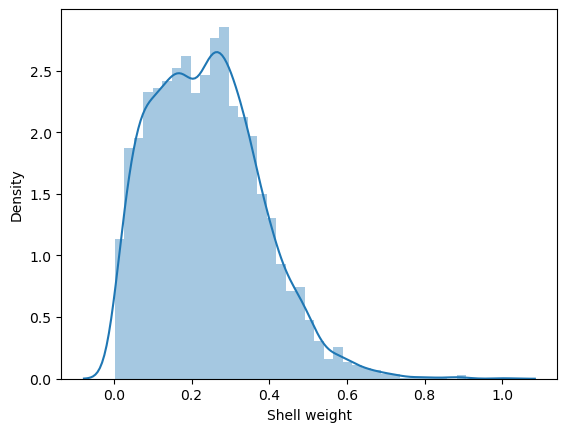

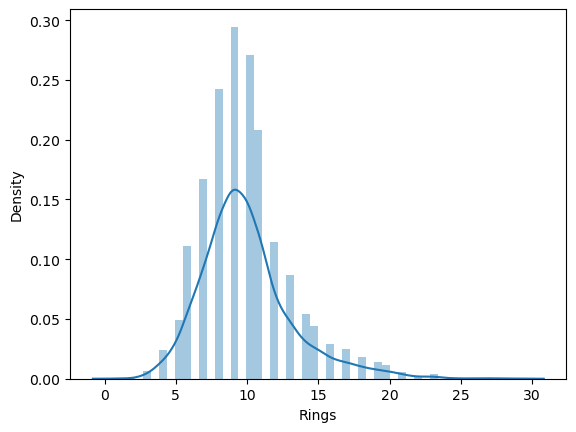

In [88]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

Here you can see all the distribution plot of every column using for loop.

In [89]:
df.describe()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observations-------- 

Mean of height column is greater than median hence it is right skewed Similar with Whole weight /shucked weight. Standard deviation is high in whole weight ,shucked weight.It means data spread is high.

high gap between 75th percentile and max is present in Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings. So few outliers is present.

Gender               Axes(0.125,0.653529;0.227941x0.226471)
Length            Axes(0.398529,0.653529;0.227941x0.226471)
Diameter          Axes(0.672059,0.653529;0.227941x0.226471)
Height               Axes(0.125,0.381765;0.227941x0.226471)
Whole weight      Axes(0.398529,0.381765;0.227941x0.226471)
Shucked weight    Axes(0.672059,0.381765;0.227941x0.226471)
Viscera weight           Axes(0.125,0.11;0.227941x0.226471)
Shell weight          Axes(0.398529,0.11;0.227941x0.226471)
Rings                 Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

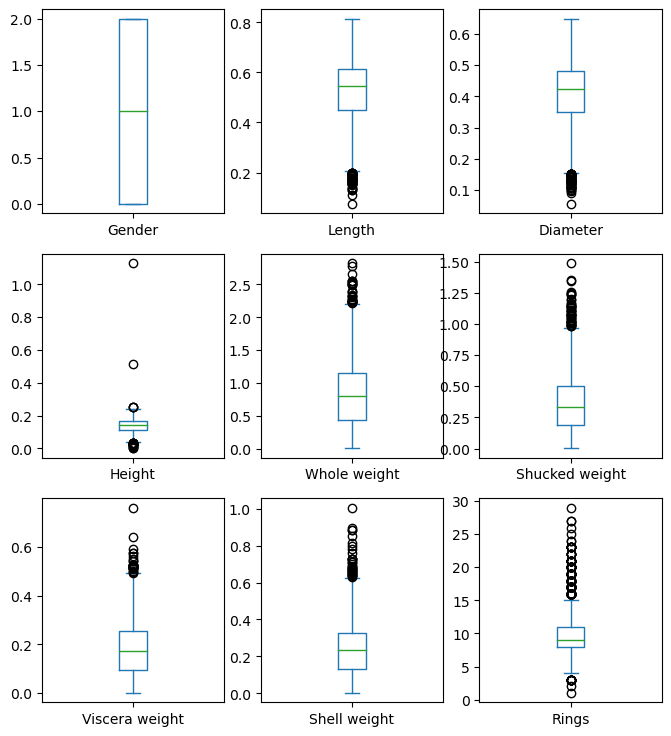

In [91]:
df.plot(kind="box",layout=(3,3),subplots=True,figsize=(8,9))

In [92]:
df.skew()

Gender           -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Here you can see high skewness present in "Height" column so I have to remove that skewness.So how can I do that lets see:

In [93]:
#df[ 'Height']=np. Log(df[ 'Height'])
df['Height']=np.sqrt(df[ 'Height'])

In [94]:
df.skew()

Gender           -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Now you can see "Height" column skewness is being reduced.

<Axes: xlabel='Height', ylabel='Count'>

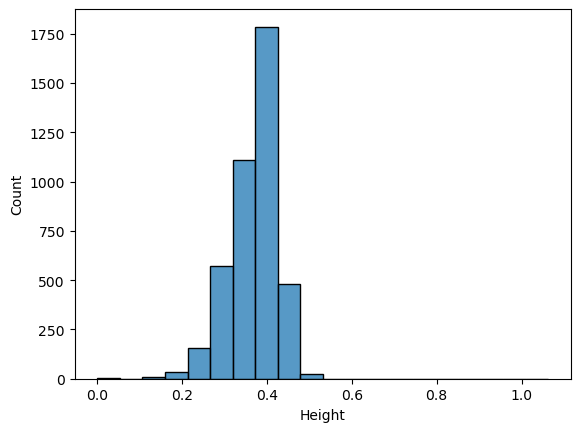

In [97]:
sns.histplot(df["Height"],bins=20)

# checking outliers:

In [98]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.081207,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.226890,1.230277,1.170910,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.032048,0.309469,0.463500,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.277846,0.637819,0.648238,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.530942,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.655163,0.118813,0.047908,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.032048,0.279929,0.358808,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.480404,0.708212,0.748559,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.320164,0.541998,0.773341,0.733627,0.410739,0.020571


In [100]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [105]:
df.iloc[83,8]

21

# Removing outliers:

In [107]:
new_df=df[(z<3).all(axis=1)]
print(df.shape)
print(new_df.shape)


(4177, 9)
(4019, 9)


Here you can see 158 rows are deleted because they have outliers.

In [108]:
new_df.corr()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Gender,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
Shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
Viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings,-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


<Axes: >

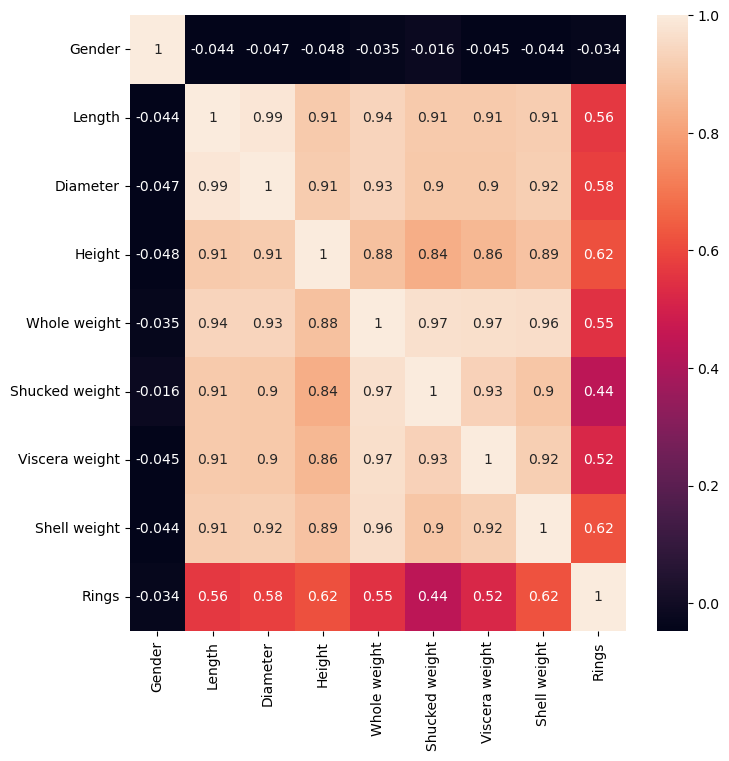

In [110]:
plt.figure(figsize=(8,8))
sns.heatmap(new_df.corr(),annot=True)

In [111]:
x=new_df.iloc[:,:-1]
x.head(2)

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.15
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.07


In [112]:
y=new_df.iloc[:,-1]
y.tail(2)

4175    10
4176    12
Name: Rings, dtype: int64

# Checking multicollinearity with using variance_inflation_factor:

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
x.shape

(4019, 8)

In [115]:
x.shape[1]

8

In [117]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["Features Name"]=x.columns
    print(vif)

In [118]:
vif_cal()

   VIF Factor   Features Name
0    2.632493          Gender
1  802.340579          Length
2  763.963727        Diameter
3  154.948351          Height
4  441.891678    Whole weight
5  110.275122  Shucked weight
6   65.499021  Viscera weight
7   92.744708    Shell weight


Data Cleansing

Feature engineering selection of feature/variables/columns

detect outliers /remove

In [119]:
new_df.drop(["Length","Shucked weight"],axis=1,inplace=True)

In [121]:
new_df.head(2)

,Gender,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.308221,0.5140,0.1010,0.15,15
1,2,0.265,0.300000,0.2255,0.0485,0.07,7


You can see "Length" and "Shucked weight" column has removed because they have multicollinearity.

In [122]:
x=new_df.iloc[:,:-1]
x.head(2)

,Gender,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.15
1,2,0.265,0.300000,0.2255,0.0485,0.07


In [123]:
y=new_df.iloc[:,-1]
y.tail(2)

4175    10
4176    12
Name: Rings, dtype: int64

In [124]:
vif_cal()

   VIF Factor   Features Name
0    2.623184          Gender
1  207.507326        Diameter
2  131.432133          Height
3  140.572357    Whole weight
4   60.762342  Viscera weight
5   58.911776    Shell weight


<Axes: >

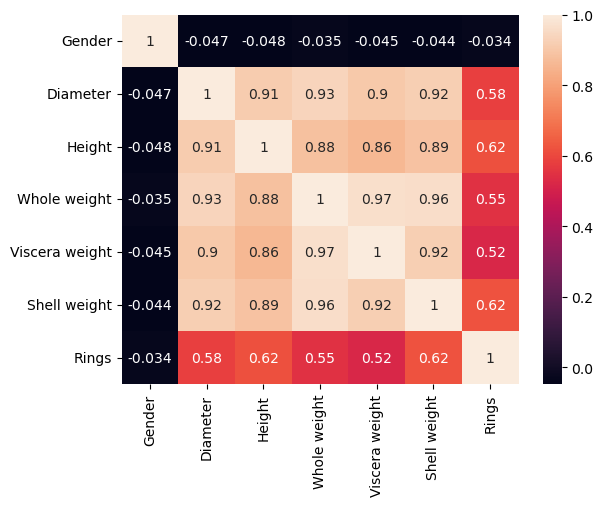

In [126]:
sns.heatmap(new_df.corr(),annot=True)

# Entering LinearRegression machine learning:

In [127]:
x.shape

(4019, 6)

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=55)

In [129]:
lr=LinearRegression()

In [137]:
x_train.shape

(2813, 6)

In [138]:
x_test.shape

(1206, 6)

In [139]:
y_train.shape

(2813,)

In [140]:
y_test.shape

(1206,)

In [141]:
lr.fit(x_train,y_train)

LinearRegression()

In [143]:
lr.score(x_train,y_train)

0.46367716121560787

In [145]:
lr.coef_

array([ 1.02692955e-02,  3.79342326e+00,  1.98593030e+01, -6.07234644e+00,
        1.26739670e+00,  2.41004043e+01])

In [147]:
features=['Gender', 'Diameter', 'Height', 'Whole weight', 'Viscera weight','Shell weight']
       

In [148]:
list(zip(features,lr.coef_))

[('Gender', 0.010269295517533316),
 ('Diameter', 3.793423262517655),
 ('Height', 19.859303037560913),
 ('Whole weight', -6.072346439891609),
 ('Viscera weight', 1.2673967027121185),
 ('Shell weight', 24.10040433946776)]

In [150]:
cfdf=pd.DataFrame(lr.coef_,index=features)
cfdf

,0
Gender,0.010269
Diameter,3.793423
Height,19.859303
Whole weight,-6.072346
Viscera weight,1.267397
Shell weight,24.100404


In [151]:
lr.intercept_

0.00921254402859617

In [144]:
pred=lr.predict(x_test)
pred

array([12.11331063, 11.61504384,  9.61650377, ..., 10.38679789,
        9.70195901, 10.88035602])

In [152]:
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

Mean squared error: 4.538196137382711
Mean absolute error: 1.5985286611387992
Root Mean squared error: 2.130304235874001


In [153]:
print("R2 Score:",r2_score(y_test,pred))

R2 Score: 0.42899509023721416


In [154]:
t=np.array([2,0.365,0.308221,0.5140,0.1010,0.15])

In [155]:
t=t.reshape(1,-1)

In [156]:
lr.predict(t)

array([8.15728652])

# Regularization(Ridge,Lasso,ElasticNet):

In [158]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet 

In [159]:
from sklearn.metrics import r2_score

In [165]:
#Ridge
rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.463677161043617

In [166]:
rdg.coef_

array([ 1.02675710e-02,  3.79390797e+00,  1.98579869e+01, -6.07210977e+00,
        1.26720543e+00,  2.40998252e+01])

In [167]:
predrdg=rdg.predict(x_test)
predrdg

array([12.11330972, 11.61503695,  9.61652757, ..., 10.38680512,
        9.70197692, 10.88029247])

In [168]:
#Lasso
las=Lasso(alpha=.0001,random_state=45)
las.fit(x_train,y_train)
las.score(x_train,y_train)

0.46367099319941385

In [169]:
las.coef_

array([ 9.55229018e-03,  3.75307749e+00,  1.97555042e+01, -5.98785748e+00,
        1.08121310e+00,  2.40080845e+01])

In [170]:
predlas=las.predict(x_test)
predlas

array([12.11377488, 11.60428572,  9.61327003, ..., 10.38748956,
        9.70486855, 10.86478659])

# Approching more regressor:

In [171]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

In [181]:
dtr=DecisionTreeRegressor(criterion="squared_error")

dtr.fit(x_train,y_train)

print("DTC Score :",dtr.score(x_train,y_train))

preddtr=dtr.predict(x_test)
print("R2 score :",r2_score(y_test,preddtr))

print("Mean squared error of dtr:",mean_squared_error(y_test,preddtr))
print("Root Mean squared error of dtr:",np.sqrt(mean_squared_error(y_test,preddtr)))


DTC Score : 1.0
R2 score : 0.0436067457400523
Mean squared error of dtr: 7.6011608623548925
Root Mean squared error of dtr: 2.7570202868957807


In [174]:
knr=KNeighborsRegressor()

knr.fit(x_train,y_train)

print("KNR Score :",knr.score(x_train,y_train))

predknr=knr.predict(x_test)
print("R2 score :",r2_score(y_test,predknr))

print("Mean squared error of knr:",mean_squared_error(y_test,predknr))
print("Root Mean squared error of knr:",np.sqrt(mean_squared_error(y_test,predknr)))

KNR Score : 0.6268961089359404
R2 score : 0.4187399235241952
Mean squared error of knr: 4.619701492537314
Root Mean squared error of knr: 2.1493490857786024


In [179]:
svr=SVR()

svr.fit(x_train,y_train)

print("SVR Score :",svr.score(x_train,y_train))

predsvr=svr.predict(x_test)
print("R2 score :",r2_score(y_test,predsvr))

print("Mean squared error of svr:",mean_squared_error(y_test,predsvr))
print("Root Mean squared error of svr:",np.sqrt(mean_squared_error(y_test,predsvr)))

SVR Score : 0.42248885948327475
R2 score : 0.40517975634461756
Mean squared error of svr: 4.727474118069007
Root Mean squared error of svr: 2.174275538672366


The best model we can concider those have more r2_score and less mean_squared_error,so based on that I can consider knr is here best model.

# Ensemble Technique:-

# First I will describe all Ensemble technique with my ow words.

Ensemble technique is used for larger dataset like 1000 rows and 300,400 columns.So if I give this dataset to machine then machine will never understand this and cant give you the proper prediction.So ensemble technique divide the whole dataset into some chunks and those chunks are provided differed different models ,these models are also called weak learners and after that we calculate the mean accuracy from all the models.

There are two ensemble technique is present :- 1> Bagging and 2> Boosting.


# 1> Bagging:- 

In Bagging technique the larger dataset first first split into subsets and those subsets are assign to different different models,these models are basically DecisionTrees and after that it calculates the average accuracy or mean accuracy from all DecisionTrees.This is why bagging is also known as parallal.

Bagging has two methods :- 1> RandomForest and 2> ExtraTrees.

These two methods have their own Regressor and Classifiers like RandomForestRegressor , RandomForestClassifier and ExtraTreesRegressor , ExtraTreesClassifier.These are present in sklearn.


# 2> Boosting:- 

In Boosting technique the whole dataset passed through a model and then its output again passed through the another model and its goes on.Default number for this 50 but you can change that.After all this passing we get mean accuracy.So this is why Boosting is also called Sequential technique.

Boosting has three method:- 1> Adaboost, 2> GradientBoosting and 3> Voting classifier

These two methods have their own Regressor and Classifier.Those are like AdaboostRegressor , AdaboostClassifier and GradientBoostingRegressor, GradientBoostingClassifier.These all are present in sklearn.


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.datasets import load_iris

In [4]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df["Target"]=iris.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [8]:
x=df.iloc[:,:-1]
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [9]:
y=df.iloc[:,-1]
y.tail(2)

148    2
149    2
Name: Target, dtype: int32

In [13]:
#train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=42)

# Bagging:-

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
#RandomForestClassifier(100)---------Default
rf.fit(train_x,train_y)
predrf=rf.predict(test_x)

print(accuracy_score(test_y,predrf))
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Here n_estimators=100 means there are 100 DecisionTree models where our 100 chunks are passed.Default is 100,if you get less accuracy you can increase the value like 200 but dont go beyond that.You can write rf=RandomForestClassifier(100) or rf=RandomForestClassifier() both are same.

# In Bagging there is another method we know that is called ExtraTrees but this is used on huge datasets.

# Boosting:-

In [17]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier()n_estimator=50,learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(train_x,train_y)
predad=ad.predict(test_x)

print(accuracy_score(test_y,predad))
print(confusion_matrix(test_y,predad))
print(classification_report(test_y,predad))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Here base_estimator=DecisionTreeClassifier()n_estimator=50 means default is AdaBoost also use DecisionTree and it pass the whole data to 50 models continuesly.

# You can change the base_estimator from DecisionTree to any other classifier.So how can I do that lets see: 

In [19]:
#Import support vector classifier
from sklearn.svm import SVC
svc=SVC()

#Create AdaBoostClassifier object
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm="SAMME")
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)

print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.3
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



# Here you can see I change base_estimator default DecisionTree to svc and I set a parameter algorithm to "SAMME" because in AdaBoostClassifier default "algorithm" is SAMME.R but if I did not change it to SAMME then I will get an error beacause SVC() has default karnel value "rbf" and both SAMME and rbf can not be performed as the same time.

# Voting classifier:-

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output. It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings.

Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class (A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [21]:
#importing voating classifier
from sklearn.ensemble import VotingClassifier



In [27]:
#group/ensemble of models
estimator=[]
estimator.append(("LR",KNeighborsClassifier()))
estimator.append(("DTC",DecisionTreeClassifier()))
estimator.append(("SVC",SVC(gamma="auto",probability=True)))

In [28]:
estimator

[('LR', KNeighborsClassifier()),
 ('DTC', DecisionTreeClassifier()),
 ('SVC', SVC(gamma='auto', probability=True))]

In [29]:
#VotingClassifier with Hard Votiing
vot_hard=VotingClassifier(estimators=estimator,voting="hard")

vot_hard.fit(train_x,train_y)

pred_hard=vot_hard.predict(test_x)
print(pred_hard)

print("Accuracy score for hard voting is:",accuracy_score(pred_hard,test_y))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy score for hard voting is: 1.0


In [30]:
#VotingClassifier with Soft Votiing
vot_soft=VotingClassifier(estimators=estimator,voting="soft")

vot_soft.fit(train_x,train_y)

pred_soft=vot_soft.predict(test_x)
print(pred_soft)

print("Accuracy score for soft voting is:",accuracy_score(pred_soft,test_y))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy score for soft voting is: 1.0
